# Operating Systems HW7 Practical Part

Aryan Ahadinia, 98103878


In this section, I want to describe code implemented. I had implemented a doubly circular linked list which each node in that has two links to next and previous nodes. We used a mutex lock to synchronize threads in way to keep list coherent.

In code below, we implemented insert. We insert the element at the end of the list. We acquire the lock the first and release it at the end.

```C
void insert(LinkedList_t *list, Element_t *element) {
    pthread_mutex_lock(&mutex);
    element->next = list->next;
    element->prev = list;
    list->next->prev = element;
    list->next = element;
    pthread_mutex_unlock(&mutex);
    printf("thread %d inserted %s\n", pthread_self(), element->value);
}
```

In code below, we implemented delete. We check if and element has a `NULL` pointer on each side. It means that elements isn't attached to any list so we return 0 value which indicates unsuccessful execution. Otherwise we detach the element from the list and set it's pointers to `NULL` in order to prevent double deletion of an element.

```C
int delete(Element_t *element) {
    if (element->prev == NULL || element->next == NULL) {
        return 0;
    }
    pthread_mutex_lock(&mutex);
    element->prev->next = element->next;
    element->next->prev = element->prev;
    element->prev = NULL;
    element->next = NULL;
    pthread_mutex_unlock(&mutex);
    printf("thread %d deleted %s\n", pthread_self(), element->value);
    return 1;
}
```

In code below, we implemented lookup. We use `strcmp` to check if the value of element matches to query or not.

```C
Element_t *lookup(LinkedList_t *list, const char *value) {
    pthread_mutex_lock(&mutex);
    Element_t *element = list;
    while ((element = element->next) != list) {
        if (strcmp(element->value, value) == 0) {
            pthread_mutex_unlock(&mutex);
            printf("thread %d found %s\n", pthread_self(), value);
            return element;
        }
    }
    pthread_mutex_unlock(&mutex);
    return NULL;
}
```

In code below, we implemented get length.

```C
int get_length(LinkedList_t *list) {
    pthread_mutex_lock(&mutex);
    int length = 0;
    Element_t *element = list;
    while ((element = element->next) != list)
        length++;
    pthread_mutex_unlock(&mutex);
    printf("thread %d length is %d\n", pthread_self(), length);
    return length;
}
```

Code below is the function which each thread executes. In each iteration, a random string with size of 14 is generated. Then an element created and we insert that element into the list which is globally accessible. the we get the length of the list and at the end, we try to delete that element until we get a successful execution. Note that it is possible that another thread delete that element and it might cause unsuccessful deletion.

```C
void *worker(void *arg)
{
    struct worker_args *args = (struct worker_args *)arg;
    int id = args->id;
    int num_iterations = args->num_iterations;
    for (int i = 0; i < num_iterations; i++)
    {
        char *value = randomString(14);
        Element_t *element = malloc(sizeof(Element_t));
        element->value = value;
        insert(&list, element);
        int size = get_length(&list);
        while (!delete(lookup(&list, value)));
    }
    return NULL;
}
```

Note that at the beginning, the list initial as a single element circular list.

```C
list.value = NULL;
list.next = &list;
list.prev = &list;
```


In [4]:
import os
from typing import List

import numpy as np
import matplotlib.pyplot as plt


Running codes and write results in file using UNIX file piping.

In [15]:
runs = [
    (2, 6),
    (4, 8),
    (8, 10),
    (16, 12),
]

for i, (thr, iter) in enumerate(runs):
    os.system(f".\main.exe --num_threads {thr} --num_iterations {iter} > result_{i}.txt")


In [20]:
def extract_lens(file_path) -> List:
    lens = [0]
    with open(file_path, "r") as f:
        for line in f:
            if "length" in line:
                lens.append(int(line.split(" ")[-1]))
    lens.append(0)
    return lens


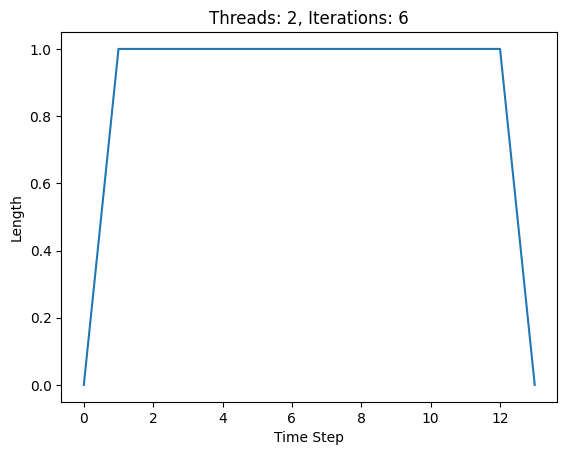

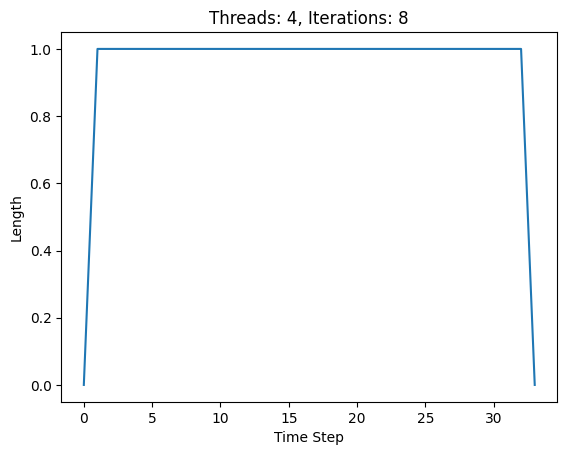

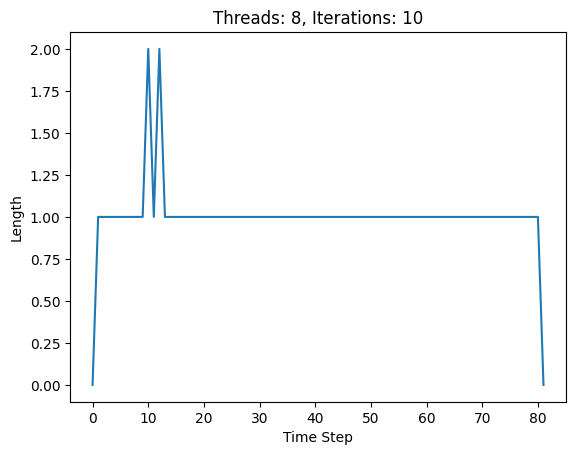

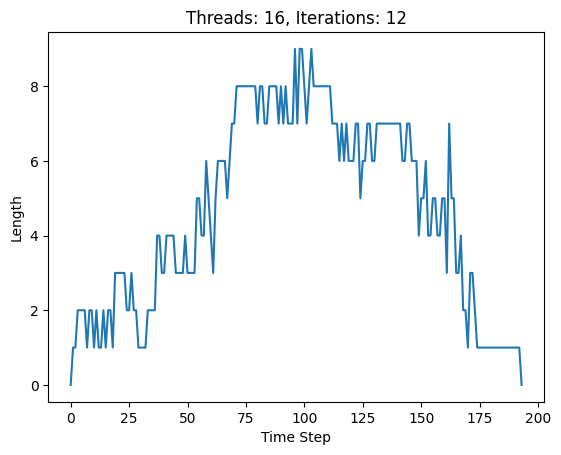

In [21]:
for i, (thr, iter) in enumerate(runs):
    plt.figure()
    plt.title(f"Threads: {thr}, Iterations: {iter}")
    plt.xlabel("Time Step")
    plt.ylabel("Length")
    plt.plot(extract_lens(f"result_{i}.txt"))
